## Project Overview

This project simulates the role of an equity research associate at a hedge fund. It focuses on analyzing financial statement data across technology, FMCG, and real estate sectors to evaluate how leverage (debt) relates to profitability. The goal is to inform investment decisions, particularly regarding real estate companies.


### Data

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.


### Import Packages Required for this Analysis

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

### Read in the data

In [24]:
income_statement = pd.read_excel(r"C:\Users\hunte\Documents\Analyst Workshop\Pandas_For_Data_Analysis\13. Building Financial Reports\Income_Statement.xlsx")
balance_sheet = pd.read_excel(r"C:\Users\hunte\Documents\Analyst Workshop\Pandas_For_Data_Analysis\13. Building Financial Reports\Balance_Sheet.xlsx")

### Verify Successful Import






#### Income Statement

In [25]:
income_statement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                60 non-null     int64 
 1   Year                      60 non-null     int64 
 2   comp_type                 60 non-null     object
 3   company                   60 non-null     object
 4   Cost Of Goods Sold        60 non-null     int64 
 5   Gross Profit              60 non-null     int64 
 6   Operating Income          60 non-null     int64 
 7   Total Operating Expenses  60 non-null     int64 
 8   Total Revenue             60 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 4.3+ KB


In [26]:
income_statement.head()

Unnamed: 0  Year comp_type company  Cost Of Goods Sold  Gross Profit  \
0           0  2019      tech    AAPL        161782000000   98392000000   
1           1  2020      tech    AAPL        169559000000  104956000000   
2           2  2021      tech    AAPL        212981000000  152836000000   
3           3  2022      tech    AAPL        223546000000  170782000000   
4           4  2019      tech    MSFT         42910000000   82933000000   

   Operating Income  Total Operating Expenses  Total Revenue  
0       63930000000              196244000000   260174000000  
1       66288000000              208227000000   274515000000  
2      108949000000              256868000000   365817000000  
3      119437000000              274891000000   394328000000  
4       42959000000               82884000000   125843000000

#### Balance Sheet

In [27]:
balance_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 60 non-null     int64  
 1   Year                       60 non-null     int64  
 2   comp_type                  60 non-null     object 
 3   company                    60 non-null     object 
 4   Accounts Payable           60 non-null     int64  
 5   Cash                       60 non-null     int64  
 6   Inventory                  44 non-null     float64
 7   Property Plant Equipment   60 non-null     int64  
 8   Short Term Investments     37 non-null     float64
 9   Total Assets               60 non-null     int64  
 10  Total Current Assets       60 non-null     int64  
 11  Total Current Liabilities  60 non-null     int64  
 12  Total Liab                 60 non-null     int64  
 13  Total Stockholder Equity   60 non-null     int64  
d

In [28]:
balance_sheet.head()

Unnamed: 0  Year comp_type company  Accounts Payable         Cash  \
0           0  2019      tech    AAPL       46236000000  48844000000   
1           1  2020      tech    AAPL       42296000000  38016000000   
2           2  2021      tech    AAPL       54763000000  34940000000   
3           3  2022      tech    AAPL       64115000000  23646000000   
4           4  2019      tech    MSFT        9382000000  11356000000   

      Inventory  Property Plant Equipment  Short Term Investments  \
0  4.106000e+09               37378000000            5.171300e+10   
1  4.061000e+09               45336000000            5.292700e+10   
2  6.580000e+09               49527000000            2.769900e+10   
3  4.946000e+09               84234000000            2.465800e+10   
4  2.063000e+09               43856000000            1.224760e+11   

   Total Assets  Total Current Assets  Total Current Liabilities  \
0  338516000000          162819000000               105718000000   
1  323888000000          143713000000               105392000000   
2  351002000000          134836000000               125481000000   
3  352755000000          135405000000               153982000000   
4  286556000000          175552000000                69420000000   

     Total Liab  Total Stockholder Equity  
0  248028000000               90488000000  
1  258549000000               65339000000  
2  287912000000               63090000000  
3  302083000000               50672000000  
4  184226000000              102330000000

### Merge The Dataframes

In [29]:
financial_statements = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])

#### Verify Successful Merge

In [30]:
financial_statements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0_x               60 non-null     int64  
 1   Year                       60 non-null     int64  
 2   comp_type                  60 non-null     object 
 3   company                    60 non-null     object 
 4   Cost Of Goods Sold         60 non-null     int64  
 5   Gross Profit               60 non-null     int64  
 6   Operating Income           60 non-null     int64  
 7   Total Operating Expenses   60 non-null     int64  
 8   Total Revenue              60 non-null     int64  
 9   Unnamed: 0_y               60 non-null     int64  
 10  Accounts Payable           60 non-null     int64  
 11  Cash                       60 non-null     int64  
 12  Inventory                  44 non-null     float64
 13  Property Plant Equipment   60 non-null     int64  
 

In [31]:
financial_statements.head()

Unnamed: 0_x  Year comp_type company  Cost Of Goods Sold  Gross Profit  \
0             0  2019      tech    AAPL        161782000000   98392000000   
1             1  2020      tech    AAPL        169559000000  104956000000   
2             2  2021      tech    AAPL        212981000000  152836000000   
3             3  2022      tech    AAPL        223546000000  170782000000   
4             4  2019      tech    MSFT         42910000000   82933000000   

   Operating Income  Total Operating Expenses  Total Revenue  Unnamed: 0_y  \
0       63930000000              196244000000   260174000000             0   
1       66288000000              208227000000   274515000000             1   
2      108949000000              256868000000   365817000000             2   
3      119437000000              274891000000   394328000000             3   
4       42959000000               82884000000   125843000000             4   

   Accounts Payable         Cash     Inventory  Property Plant Equipment  \
0       46236000000  48844000000  4.106000e+09               37378000000   
1       42296000000  38016000000  4.061000e+09               45336000000   
2       54763000000  34940000000  6.580000e+09               49527000000   
3       64115000000  23646000000  4.946000e+09               84234000000   
4        9382000000  11356000000  2.063000e+09               43856000000   

   Short Term Investments  Total Assets  Total Current Assets  \
0            5.171300e+10  338516000000          162819000000   
1            5.292700e+10  323888000000          143713000000   
2            2.769900e+10  351002000000          134836000000   
3            2.465800e+10  352755000000          135405000000   
4            1.224760e+11  286556000000          175552000000   

   Total Current Liabilities    Total Liab  Total Stockholder Equity  
0               105718000000  248028000000               90488000000  
1               105392000000  258549000000               65339000000  
2               125481000000  287912000000               63090000000  
3               153982000000  302083000000               50672000000  
4                69420000000  184226000000              102330000000

### Computing Ratios

#### Debt to Equity Ratio

In [32]:
financial_statements['Debt To Equity'] = financial_statements['Total Liab'] / financial_statements['Total Stockholder Equity']

#### Equity Multiplier Ratio

In [33]:
financial_statements["Equity Multiplier"] = financial_statements['Total Assets'] / financial_statements['Total Stockholder Equity']

#### Gross Margin Ratio

In [34]:
financial_statements['Gross Margin'] = (financial_statements['Total Revenue'] - financial_statements['Cost Of Goods Sold']) / financial_statements['Total Revenue']

#### Operating Margin Ratio

In [35]:
financial_statements['Operating Margin'] = (financial_statements['Total Revenue'] - financial_statements['Total Operating Expenses']) / financial_statements['Total Revenue']

#### Verify

In [36]:
financial_statements.head()

Unnamed: 0_x  Year comp_type company  Cost Of Goods Sold  Gross Profit  \
0             0  2019      tech    AAPL        161782000000   98392000000   
1             1  2020      tech    AAPL        169559000000  104956000000   
2             2  2021      tech    AAPL        212981000000  152836000000   
3             3  2022      tech    AAPL        223546000000  170782000000   
4             4  2019      tech    MSFT         42910000000   82933000000   

   Operating Income  Total Operating Expenses  Total Revenue  Unnamed: 0_y  \
0       63930000000              196244000000   260174000000             0   
1       66288000000              208227000000   274515000000             1   
2      108949000000              256868000000   365817000000             2   
3      119437000000              274891000000   394328000000             3   
4       42959000000               82884000000   125843000000             4   

   ...  Short Term Investments  Total Assets  Total Current Assets  \
0  ...            5.171300e+10  338516000000          162819000000   
1  ...            5.292700e+10  323888000000          143713000000   
2  ...            2.769900e+10  351002000000          134836000000   
3  ...            2.465800e+10  352755000000          135405000000   
4  ...            1.224760e+11  286556000000          175552000000   

   Total Current Liabilities    Total Liab  Total Stockholder Equity  \
0               105718000000  248028000000               90488000000   
1               105392000000  258549000000               65339000000   
2               125481000000  287912000000               63090000000   
3               153982000000  302083000000               50672000000   
4                69420000000  184226000000              102330000000   

   Debt To Equity  Equity Multiplier  Gross Margin  Operating Margin  
0        2.741004           3.741004      0.378178          0.245720  
1        3.957039           4.957039      0.382332          0.241473  
2        4.563512           5.563512      0.417794          0.297824  
3        5.961537           6.961537      0.433096          0.302887  
4        1.800313           2.800313      0.659020          0.341370  

[5 rows x 24 columns]

### Grouping Ratios Over Company Type

#### Gross Margin (Profitability Ratio)

In [37]:
grouped_gm = pd.pivot_table(financial_statements, index = "comp_type", values = "Gross Margin")

In [38]:
grouped_gm

Gross Margin
comp_type              
fmcg           0.514396
real_est       0.534848
tech           0.572062

In [39]:
lowest_profitability = "fmcg"

#### Debt to Equity (Leverage Ratio)

In [40]:
grouped_de = pd.pivot_table(financial_statements, index = "comp_type", values = "Debt To Equity")

In [41]:
grouped_de

Debt To Equity
comp_type                
fmcg             2.997896
real_est         5.692041
tech             1.777448

In [42]:
highest_leverage = "real_est"

### Plotting Relationship between leverage and profitability in real estate companies

In [43]:
real_est = financial_statements.loc[financial_statements["comp_type"] == "real_est"]

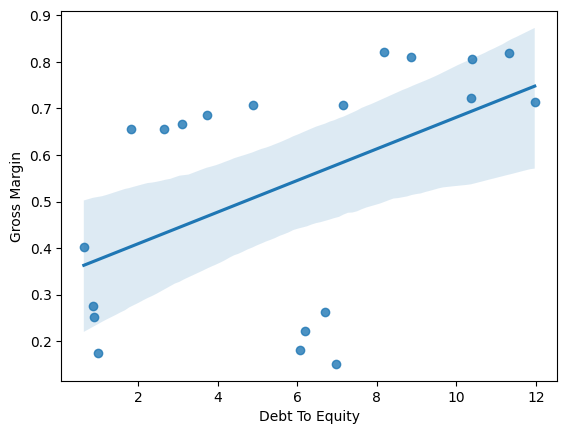

In [44]:
plot = sns.regplot(data=real_est, x="Debt To Equity", y="Gross Margin")

In [45]:
relationship = "Positive"

### Basic Regression Model

In [64]:
x = real_est[["Debt To Equity"]]
y = real_est['Gross Margin']

In [68]:
model = LinearRegression()
model.fit(x, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("RÂ² Score:", model.score(x, y))

Intercept: 0.34156648804550116
Slope: 0.03395651934013959
RÂ² Score: 0.24527563708834443


### Boxplot Comparing Gross Margin Across Industries

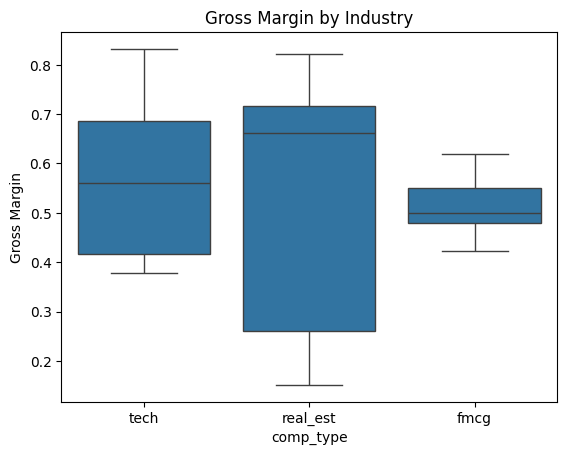

In [58]:
sns.boxplot(financial_statements, x="comp_type", y="Gross Margin")
plt.title("Gross Margin by Industry")
plt.show()

### Lineplot of Debt to Equity over Years by industry

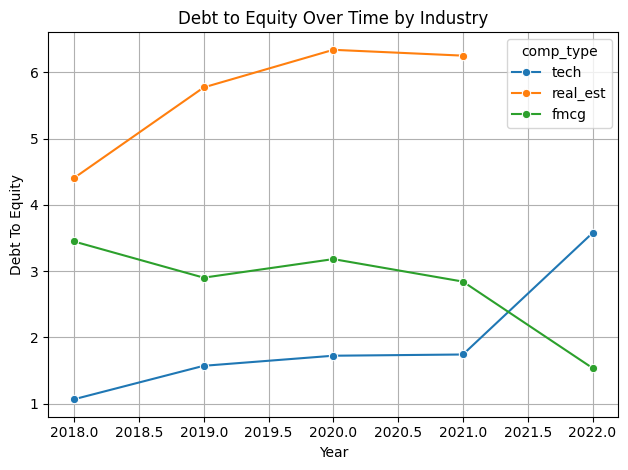

In [55]:
sns.lineplot(financial_statements, x='Year', y="Debt To Equity", hue="comp_type", marker='o', errorbar=None)
plt.title("Debt to Equity Over Time by Industry")
plt.grid(True)
plt.tight_layout()
plt.show()

## ðŸ§  Key Insights

- **Real estate companies** show the highest **Debt to Equity** ratios across industries, averaging over 5.6 â€” indicating heavy reliance on leverage.
- **FMCG companies** have the **lowest Gross Margins**, which means they make less profit from each dollar of sales. This could be due to higher costs or tighter pricing.
- The **Gross Margin** boxplot shows that **Real Estate** firms have the **highest median profitability**, but also the **widest variability** in performance. **Tech** companies follow with a slightly lower median, but demonstrate **more consistent margins**. **FMCG** firms show the lowest and most stable gross margins overall.
- A **linear regression model** and **scatter plot** on real estate firms reveals a **positive correlation** between leverage and profitability:
  - Slope: `0.0339`
  - RÂ² Score: `0.25`
  - This suggests leverage contributes to profitability, but it isnâ€™t the only factor â€” operational strategy likely plays a large role.
- **Visual trends** over time show tech companies are increasing their leverage, while FMCG firms are reducing it â€” possibly signaling different risk strategies across sectors.

---

## ðŸ“Œ Interpretation for Investors

Real estate firms may use leverage effectively to enhance profits, but the relationship is modest. This implies **leverage alone isn't a reliable profitability signal**, and further analysis of cost structure, cash flow, and asset returns is needed before making investment decisions.



